<a href="https://colab.research.google.com/github/matthewshawnkehoe/Thinkful/blob/main/births_and_smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Does smoking cause low birth weight?

## Introduction
As data scientists at a large healthcare organization, we constantly strive to find ways which can improve human health and longevity. During an annual meeting of maternal health, a couple of members from the audience asked if there was a data-driven method of finding factors that impact the health of newborns. A couple of pregnant women were smokers and asked if smoking would negatively impact the health of their unborn children. Interested in answering this question analytically, we decided to use a data-driven approach through A/B testing.

We decided that the birth weight of a newborn is a good indentifier of overall health and that we would like to identify if smoking decreases the birth weight of newborns. Our analysis will benefit current and future mothers, physicians, and healthcare organizations.

![](https://www.verywellfamily.com/thmb/xVJtWvUQ4OG6Zo688kUEUc-chto=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/baby-birth-weight-statistics-9b84ab741b2e4eefbdc4f399037558f9.jpg)

Image Source: [Physical Growth in Newborns](https://www.uofmhealth.org/health-library/te6295)

## Table of Contents
---
- [Introduction](#Introduction)
- [Hypothesis](#Hypothesis)
- [Data Analysis](#Data-Analysis)
- [Methods](#Test-Statistic)
- [Results](#Further-Analysis-through-Additional-Variables)
- [Discussion and recommendations](#Discussion-and-recommendations)

## Hypothesis
To decide if smoking impacts the health of newborns, we formed the following **null (H₀)** hypothesis and **alternative (Hₐ)** hypothesis.

**H₀:** In the population, the birth weight distribution is the same whether the mother smokes or not. Smoking does not impact birth weight.

**Hₐ:**  In the population, smokers' babies have a lower birth weight on average than those of non-smokers.

## Data Analysis

To avoid spending money on organizing a survey ourselves, we'll make use of existing data to determine whether we can answer our hypothesis. One good candidate for our purpose is the [Berkeley Stats Lab](https://www.stat.berkeley.edu/~statlabs/labs.html) birth weight data. The survey data is publicly available in [this GitHub repository](https://github.com/data-8/textbook). Below, we'll do a quick exploration of the `baby.csv` file stored in the repository just mentioned. We'll read in the file using the direct link [here](https://github.com/data-8/textbook/tree/main/assets/data/baby.csv).

A quick search shows that the dataset contains 1,174 observations and 6 variables. More specifically, the variables are

* `birth weight`: the baby's birth weight in ounces
* `gestational days`: the number of gestational days
* `maternal age`: the mother's age in years
* `maternal height`: the mother's height in inches
* `maternal pregnancy weight`: the mother's pregnancy weight in pounds
* `maternal smoker`: whether or not the mother smoked during pregnancy

We will now explore the data.

In [10]:
# Load libraries and configure environment
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
plt.style.use('fivethirtyeight')

# This doesn't work so I directly put the file it Google Colab
# births = pd.read_csv("https://github.com/data-8/textbook/tree/main/assets/data/baby.csv")
births = pd.read_csv("baby.csv")

# Convert column headers to lower case for ease of coding
births.columns = births.columns.str.lower()

# Inspect data
print(births.shape)

births.info()
births.head()

(1174, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   birth weight               1174 non-null   int64
 1   gestational days           1174 non-null   int64
 2   maternal age               1174 non-null   int64
 3   maternal height            1174 non-null   int64
 4   maternal pregnancy weight  1174 non-null   int64
 5   maternal smoker            1174 non-null   bool 
dtypes: bool(1), int64(5)
memory usage: 47.1 KB


,birth weight,gestational days,maternal age,maternal height,maternal pregnancy weight,maternal smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


We see that we have five numerical fields and a boolean representing categorical data for smoking. None of the fields have nulls, so we won't need to perform any data cleaning.

## Methods

For our analysis, we will create two Dataframes, one containing the birth weight of mothers who are smokers and another containing the birth weight for mothers who don't smoke. We suspect that this will allow us to analytically answer our research question and decide if smoking influences birth weight.

If the distributions of birth weights appear to be close to normally distributed based on their histogram, skewness, and kurtosis, we will conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval.

We first split the data into smokers and non-smokers.

In [11]:
smoker_yes = births[births['maternal smoker'] == True]
smoker_no = births[births['maternal smoker'] == False]
# Count number of smokers and non-smokers
print(births['maternal smoker'].groupby(births['maternal smoker']).agg(['count']))

                 count
maternal smoker       
False              715
True               459


We see that there are 459 smokers and 715 nonsmokers among the 1174 women sampled. Now we will check if the data is normally distributed.

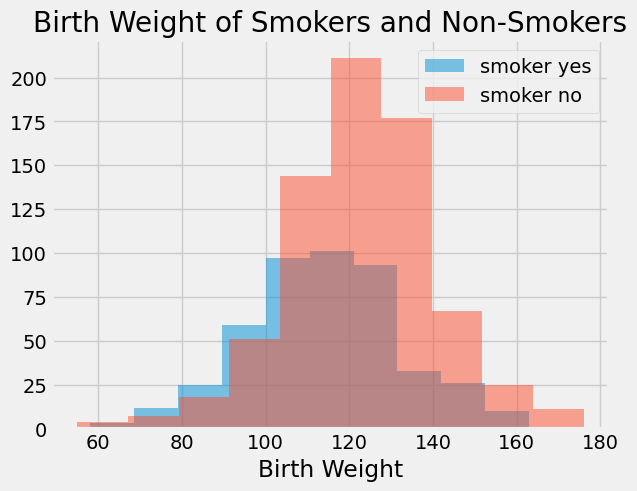

In [19]:
plt.hist(smoker_yes['birth weight'], alpha = .5, label = "smoker yes")
plt.hist(smoker_no['birth weight'], alpha = .5, label = "smoker no")
plt.legend(loc="upper right")
plt.xlabel('Birth Weight')
plt.title("Birth Weight of Smokers and Non-Smokers")
plt.show()

In [13]:
print(stats.describe(smoker_yes['birth weight']))
print(stats.describe(smoker_no['birth weight']))

DescribeResult(nobs=459, minmax=(58, 163), mean=113.81917211328977, variance=334.7074045532817, skewness=-0.02118644337959522, kurtosis=-0.05246237500936468)
DescribeResult(nobs=715, minmax=(55, 176), mean=123.08531468531469, variance=303.58514818514817, skewness=-0.16278727504369808, kurtosis=1.0168432036227957)


Our results show that our data is normally distributed and we now conduct our t-test and look at the 95% confidence interval.

In [14]:
# Conduct the t-test
stats.ttest_ind(smoker_yes['birth weight'], smoker_no['birth weight'])

TtestResult(statistic=-8.718755502379533, pvalue=9.461067881089321e-18, df=1172.0)

In [15]:
# Confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [16]:
print(get_95_ci(smoker_yes['birth weight'], smoker_no['birth weight']))

The difference in means at the 95% confidence interval (two-tail) is between 7.160802712877646 and 11.37148243117219.


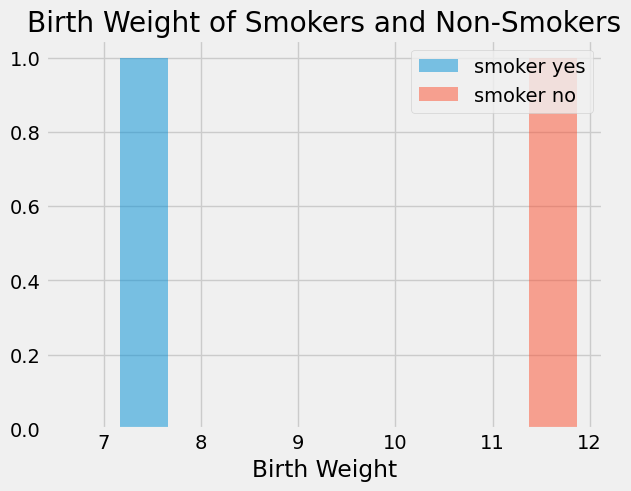

In [31]:
def get_95_ci_for_viz(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return ci_lower, ci_upper

low, high = get_95_ci_for_viz(smoker_yes['birth weight'], smoker_no['birth weight'])

# Plot results using a histogram
plt.hist(low, alpha = .5, label = "smoker yes", width=0.5)
plt.hist(high, alpha = .5, label = "smoker no", width=0.5)
plt.legend(loc="upper right")
plt.xlabel('Birth Weight')
plt.title("Birth Weight of Smokers and Non-Smokers")
plt.show()

We will also look at the mean of smokers and non-smokers. We see that the birth weight for smokers is lower than that of non-smokers.

In [32]:
print(f'The average birth weight for non-smokers is ',smoker_no['birth weight'].mean())
print(f'The average birth weight for smokers is ',smoker_yes['birth weight'].mean())

The average birth weight for non-smokers is  123.08531468531469
The average birth weight for smokers is  113.81917211328977


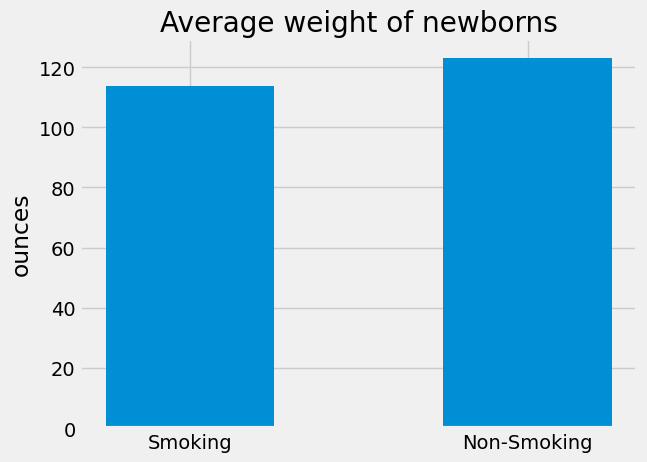

In [40]:
# Plot results using a bar chart

DayOfWeekOfCall = [1,2]
DispatchesOnThisWeekday = [smoker_yes['birth weight'].mean(), smoker_no['birth weight'].mean()]

labels = ["Smoking", "Non-Smoking"]

plt.bar(DayOfWeekOfCall, DispatchesOnThisWeekday, align='center', width = 0.5)
plt.xticks(DayOfWeekOfCall, labels)
plt.ylabel('ounces')
plt.title('Average weight of newborns')
plt.show()

## Results

We set out to identify if smoking causes low birth weight. To simplify our data analysis, we used existing data from a study done at the Stats Lab at UC Berkeley. Using A/B testing, we confirmed that our data was normally distributed and that we could conduct a t-test. Our results showed a p-value of `9.46e-18`, indicating that smoking does influence the birth weight of newborns and mothers who smoke generally have babies with a lower birth weight.

The 95% confidence interval suggests that the difference in birth weight between smokers and non-smokers is between 7.16 and 11.37 ounces. The average birth weight of smokers is 113.82 ounces while the average birth weight of non-smokers is 123.08 ounces.

## Discussion and recommendation

There is a wide range of negative health outcomes associated with a low birth weight. For example, it is closely associated with fetal and neonatal mortality and morbidity, inhibited growth and cognitive development as well as noncommunicable diseases in adulthood. Infants with low birth weight are about 20 times more likely to die than those with a higher birth weight. Therefore, we would like to further use data-driven analysis to help our healthcare orgnaization find other factors which cause low birth weight. We recommend the performing the following studies:

* Given the five other variables included in the UC Berkley dataset, does gestation days, maternal age, maternal height, or maternal pregnancy weight impact the birth weight of newborns?
* Does alcohol consumption decrease birth weight? We would need to look at data from a different data source or conduct a different study in order to see the effects of alcohol consumption.
* Does variables from the father influence birth weight? We would once again need to perform a different study or use a different dataset.